In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:04<00:00, 39.9MB/s]
100% 163M/163M [00:04<00:00, 35.5MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_ = os.listdir('/content/data/with_mask')
print(with_mask_[0:5])
print(with_mask_[-5:])

['with_mask_2650.jpg', 'with_mask_913.jpg', 'with_mask_2664.jpg', 'with_mask_1702.jpg', 'with_mask_1793.jpg']
['with_mask_2545.jpg', 'with_mask_2386.jpg', 'with_mask_3163.jpg', 'with_mask_724.jpg', 'with_mask_2413.jpg']


In [8]:
without_masks = os.listdir('/content/data/without_mask')
print(without_masks[0:5])
print(without_masks[-5:])

['without_mask_1903.jpg', 'without_mask_3705.jpg', 'without_mask_3085.jpg', 'without_mask_2512.jpg', 'without_mask_3352.jpg']
['without_mask_3379.jpg', 'without_mask_3100.jpg', 'without_mask_289.jpg', 'without_mask_2294.jpg', 'without_mask_3504.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_))
print('Number of without mask images:', len(without_masks))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

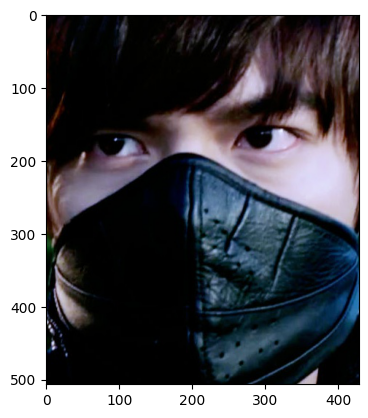

In [54]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1089.jpg')
imgplot = plt.imshow(img)
plt.show()

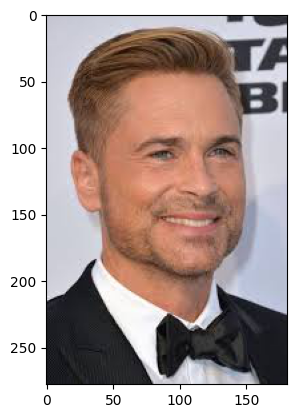

In [55]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1028.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_masks:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       ...,

       [[230, 230, 230],
        [227, 227, 227],
        [225, 225, 225],
        ...,
        [230, 230, 232],
        [230, 230, 232],
        [230, 230, 232]],

       [[230, 229, 229],
        [229, 228, 229],
        [228, 227, 228],
        ...,
        [232, 232, 234],
        [232, 232, 234],
        [232, 232, 234]],

       [[229, 227, 228],
        [230, 228, 229],
        [230, 228, 229],
        ...,
        [233, 233, 235],
        [233, 233, 235],
        [234, 234, 236]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
X_train[0]

array([[[ 74,  78, 113],
        [ 74,  78, 113],
        [ 74,  78, 113],
        ...,
        [ 65,  70,  92],
        [ 73,  78, 100],
        [ 78,  83, 105]],

       [[ 75,  79, 114],
        [ 75,  79, 114],
        [ 75,  80, 113],
        ...,
        [ 59,  64,  86],
        [ 66,  71,  94],
        [ 71,  76,  98]],

       [[ 75,  79, 114],
        [ 76,  79, 114],
        [ 76,  81, 113],
        ...,
        [ 44,  49,  70],
        [ 50,  55,  76],
        [ 53,  58,  79]],

       ...,

       [[228, 227, 241],
        [228, 226, 241],
        [229, 227, 242],
        ...,
        [147, 126, 139],
        [169, 145, 154],
        [180, 154, 162]],

       [[236, 234, 247],
        [233, 230, 244],
        [229, 226, 240],
        ...,
        [162, 139, 150],
        [175, 149, 156],
        [182, 153, 159]],

       [[243, 241, 254],
        [240, 236, 250],
        [233, 229, 243],
        ...,
        [171, 147, 157],
        [178, 151, 157],
        [182, 152, 157]]

In [31]:
X_train_scaled[0]

array([[[0.29019608, 0.30588235, 0.44313725],
        [0.29019608, 0.30588235, 0.44313725],
        [0.29019608, 0.30588235, 0.44313725],
        ...,
        [0.25490196, 0.2745098 , 0.36078431],
        [0.28627451, 0.30588235, 0.39215686],
        [0.30588235, 0.3254902 , 0.41176471]],

       [[0.29411765, 0.30980392, 0.44705882],
        [0.29411765, 0.30980392, 0.44705882],
        [0.29411765, 0.31372549, 0.44313725],
        ...,
        [0.23137255, 0.25098039, 0.3372549 ],
        [0.25882353, 0.27843137, 0.36862745],
        [0.27843137, 0.29803922, 0.38431373]],

       [[0.29411765, 0.30980392, 0.44705882],
        [0.29803922, 0.30980392, 0.44705882],
        [0.29803922, 0.31764706, 0.44313725],
        ...,
        [0.17254902, 0.19215686, 0.2745098 ],
        [0.19607843, 0.21568627, 0.29803922],
        [0.20784314, 0.22745098, 0.30980392]],

       ...,

       [[0.89411765, 0.89019608, 0.94509804],
        [0.89411765, 0.88627451, 0.94509804],
        [0.89803922, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [46]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=3)

Epoch 1/3
152/152 [==============================] - 3s 22ms/step - loss: 0.2394 - acc: 0.9110 - val_loss: 0.2870 - val_acc: 0.8834
Epoch 2/3
152/152 [==============================] - 3s 19ms/step - loss: 0.2131 - acc: 0.9268 - val_loss: 0.2385 - val_acc: 0.9049
Epoch 3/3
152/152 [==============================] - 3s 22ms/step - loss: 0.1743 - acc: 0.9375 - val_loss: 0.2701 - val_acc: 0.9007


**Model Evaluation**

In [47]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2126 - acc: 0.9146
Test Accuracy = 0.9146260619163513


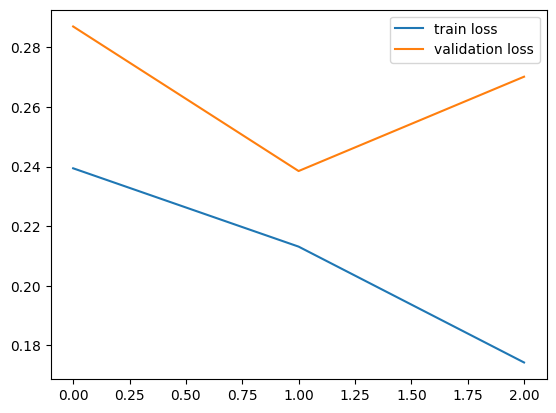

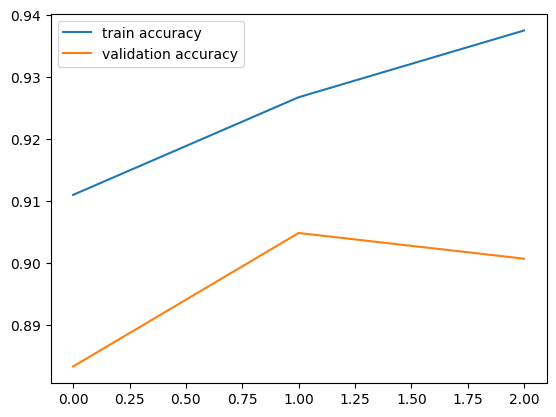

In [48]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/download.png


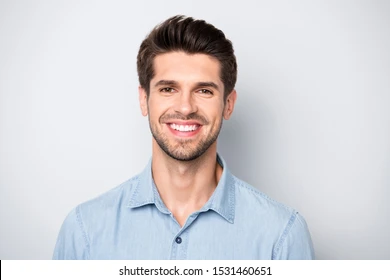

1/1 [==============================] - 0s 24ms/step
[[0.49857405 0.5345772 ]]
1
The person in the image is not wearing a mask


In [51]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/mask.webp


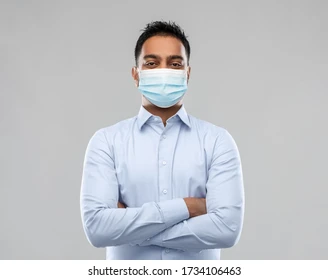

1/1 [==============================] - 0s 19ms/step
[[0.58278245 0.43140668]]
0
The person in the image is wearing a mask


In [56]:
      input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')